In [402]:
import pandas as pd

data = pd.read_csv("datasets/loan-approvals.csv")

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y


In [403]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [404]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [405]:
# Or we can use LabelEncoder!

data["Dependents"] = data["Dependents"].replace("3+", 3)
data["Loan_Status"] = data["Loan_Status"].replace("N", 0)
data["Loan_Status"] = data["Loan_Status"].replace("Y", 1)
data["Gender"] = data["Gender"].replace("Female", 0)
data["Gender"] = data["Gender"].replace("Male", 1)
data["Married"] = data["Married"].replace("No", 0)
data["Married"] = data["Married"].replace("Yes", 1)
data["Education"] = data["Education"].replace("Not Graduate", 0)
data["Education"] = data["Education"].replace("Graduate", 1)
data["Self_Employed"] = data["Self_Employed"].replace("No", 0)
data["Self_Employed"] = data["Self_Employed"].replace("Yes", 1)

C:\Users\LEO\AppData\Local\Temp\ipykernel_4408\1150466523.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Loan_Status"] = data["Loan_Status"].replace("Y", 1)
C:\Users\LEO\AppData\Local\Temp\ipykernel_4408\1150466523.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Gender"] = data["Gender"].replace("Male", 1)
C:\Users\LEO\AppData\Local\Temp\ipykernel_4408\1150466523.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly 

In [406]:
data["LoanAmount"] = data["LoanAmount"].fillna(data["LoanAmount"].mean())
data["Gender"] = data["Gender"].fillna(data["Gender"].mode()[0])
data["Married"] = data["Married"].fillna(data["Married"].mode()[0])
data["Dependents"] = data["Dependents"].fillna(data["Dependents"].mode()[0])
data["Self_Employed"] = data["Self_Employed"].fillna(data["Self_Employed"].mode()[0])
data["Loan_Amount_Term"] = data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode()[0])

In [407]:
data = data.drop("Loan_ID", axis = 1)

In [408]:
x = data.drop("Loan_Status", axis = 1)
y = data["Loan_Status"]

#### Imbalanced Dataset!

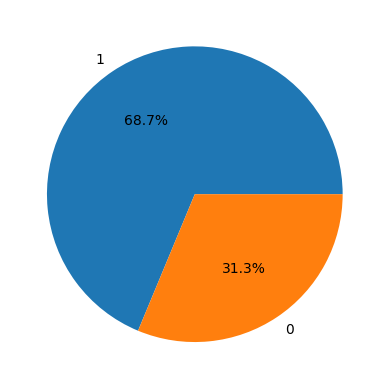

In [409]:
import matplotlib.pyplot as plt

counts = y.value_counts()
labels = counts.index.to_list()

plt.pie(x = counts, labels = labels, autopct = "%1.1f%%")
plt.show()

In [410]:
from sklearn.utils import resample

print("examples count before resample:", data["Loan_Status"].count())
loan_approved_data = data[data["Loan_Status"] == 1]
loan_rejected_data = data[data["Loan_Status"] == 0]

resample_count = loan_approved_data["Loan_Status"].count()

loan_rejected_resampled_data = resample(loan_rejected_data, n_samples = resample_count, replace = True)

data = pd.concat([loan_approved_data, loan_rejected_resampled_data])
print("examples count after resample:", data["Loan_Status"].count())

examples count before resample: 614
examples count after resample: 844


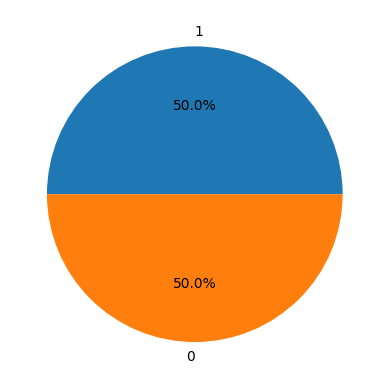

In [411]:
x = data.drop("Loan_Status", axis = 1)
y = data["Loan_Status"]

counts = y.value_counts()
labels = counts.index.to_list()

plt.pie(x = counts, labels = labels, autopct = "%1.1f%%")
plt.show()

In [412]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size = 0.2)

In [413]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(x_train, y_train)

DecisionTreeClassifier()

In [414]:
y_predict = model.predict(x_test)

In [415]:
from sklearn import metrics

metrics.confusion_matrix(y_test, y_predict)

array([[63, 19],
       [19, 68]], dtype=int64)

In [416]:
metrics.accuracy_score(y_test, y_predict)

0.7751479289940828

In [417]:
metrics.precision_score(y_test, y_predict)

0.7816091954022989

In [418]:
metrics.recall_score(y_test, y_predict)

0.7816091954022989

In [419]:
metrics.f1_score(y_test, y_predict)

0.7816091954022989